In [53]:
# Convert Yolo bb to Pascal_voc bb
def yolo_to_pascal_voc(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    x2 = x1 + w
    y2 = y1 + h
    return [x1, y1, x2, y2]

In [54]:
yolo_to_pascal_voc(0.42466, 0.32724, 0.47442, 0.38282, 416,416)

[77.97919999999999, 56.505279999999985, 275.33792, 215.7584]

In [55]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm.notebook import tqdm

In [56]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = './yolov5/runs/train/exp/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2022-11-15 Python-3.10.6 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [57]:
%cd wobot/

[WinError 2] The system cannot find the file specified: 'wobot/'
E:\wobot


In [125]:
import os
image_path = os.path.join('.\data\HardHat_Test_Images\Images', 'hard_hat_workers1015.png')

image 1/1: 416x415 1 helmet
Speed: 12.3ms pre-process, 185.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


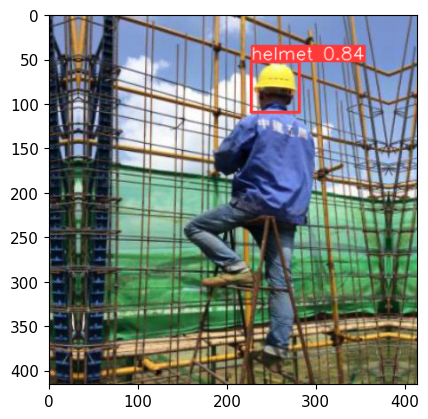

In [126]:
%matplotlib inline

results = model(image_path)
results.print()

img = np.squeeze(results.render())
plt.imshow(img)

In [63]:
output_dict = {
    '0' : 'helmet',
    '1' : 'head',
    '2' : 'person'
}

In [129]:
trial = results.xywhn
trial[0][-1]

tensor([0.61341, 0.19748, 0.13008, 0.13753, 0.84150, 0.00000])

In [65]:
s = f"""
<annotation>
    <folder>Images</folder>
    <filename>{file_name}</filename>
    <size>
        <width>416</width>
        <height>415</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
"""


In [69]:
object_for_xml = f"""
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>{xmin}</xmin>
            <ymin>{ymin}</ymin>
            <xmax>{xmax}</xmax>
            <ymax>{xmax}</ymax>
        </bndbox>
    </object>
"""

NameError: name 'xmin' is not defined

In [70]:
annot_end = "</annotation>"

In [79]:
res = results.xywhn
res = res[0][0]
res

tensor([0.44954, 0.35503, 0.04976, 0.05558, 0.71058, 0.00000])

In [88]:
pred_values = results.xywhn[0]
for result in pred_values:
    detection = output_dict[str(int(result[-1]))]
    coordinates = yolo_to_pascal_voc(result[0],result[1],result[2],result[3], 416, 416)
    xmin = coordinates[0]
    ymin = coordinates[1]
    xmax = coordinates[2]
    ymax = coordinates[3]
    
    s = s + object_for_xml
s = s + annot_end   
print(s)


<annotation>
    <folder>images</folder>
    <filename>hard_hat_workers6.png</filename>
    <size>
        <width>416</width>
        <height>415</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>86</xmin>
            <ymin>153</ymin>
            <xmax>105</xmax>
            <ymax>172</ymax>
        </bndbox>
    </object>



    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>86</xmin>
            <ymin>153</ymin>
            <xmax>105</xmax>
            <ymax>172</ymax>
        </bndbox>
    </object>

    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</tru

In [134]:
list_of_files = os.listdir(".\data\HardHat_Test_Images\Images")

In [135]:
list_of_files = list_of_files
list_of_files

['hard_hat_workers1015.png',
 'hard_hat_workers1018.png',
 'hard_hat_workers1031.png',
 'hard_hat_workers1044.png',
 'hard_hat_workers1068.png',
 'hard_hat_workers1072.png',
 'hard_hat_workers1095.png',
 'hard_hat_workers1102.png',
 'hard_hat_workers1109.png',
 'hard_hat_workers1123.png',
 'hard_hat_workers1188.png',
 'hard_hat_workers119.png',
 'hard_hat_workers12.png',
 'hard_hat_workers121.png',
 'hard_hat_workers1228.png',
 'hard_hat_workers1294.png',
 'hard_hat_workers1321.png',
 'hard_hat_workers1335.png',
 'hard_hat_workers1348.png',
 'hard_hat_workers1372.png',
 'hard_hat_workers1374.png',
 'hard_hat_workers1391.png',
 'hard_hat_workers1456.png',
 'hard_hat_workers1543.png',
 'hard_hat_workers1548.png',
 'hard_hat_workers1563.png',
 'hard_hat_workers1574.png',
 'hard_hat_workers1578.png',
 'hard_hat_workers1586.png',
 'hard_hat_workers1598.png',
 'hard_hat_workers1662.png',
 'hard_hat_workers1673.png',
 'hard_hat_workers1684.png',
 'hard_hat_workers1697.png',
 'hard_hat_workers

In [137]:
for f in list_of_files:
    path = f".\data\HardHat_Test_Images\Images\{f}"
    print(path)
    image_path = os.path.join(f".\data\HardHat_Test_Images\Images\{f}")
    
    file_name = f
    s = f"""
    <annotation>
        <folder>Images</folder>
        <filename>{file_name}</filename>
        <size>
            <width>416</width>
            <height>415</height>
            <depth>3</depth>
        </size>
        <segmented>0</segmented>
    """
    detection = "helmet"
    object_for_xml = f"""
    <object>
        <name>{detection}</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>{xmin}</xmin>
            <ymin>{ymin}</ymin>
            <xmax>{xmax}</xmax>
            <ymax>{xmax}</ymax>
        </bndbox>
    </object>
    """
    
    results = model(image_path)
    results.print()
    print(image_path)
    f = f[:len(f)- 4] + '.xml'
    print(f)
    
    pred_values = results.xywhn[0]
    for result in pred_values:
        detection = output_dict[str(int(result[-1]))]
        print(detection)
        coordinates = yolo_to_pascal_voc(result[0],result[1],result[2],result[3], 416, 416)
        xmin = coordinates[0]
        ymin = coordinates[1]
        xmax = coordinates[2]
        ymax = coordinates[3]

        s = s + object_for_xml
    s = s + annot_end  
    
    xml_file = open(f".\data\HardHat_Test_Images\Annotations\{f}", "w")
    xml_file.write(s)
    xml_file.close()


image 1/1: 416x415 1 helmet
Speed: 12.2ms pre-process, 152.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1015.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1015.png
hard_hat_workers1015.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1018.png


image 1/1: 415x416 5 helmets
Speed: 8.0ms pre-process, 146.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 3 helmets
Speed: 10.0ms pre-process, 125.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1018.png
hard_hat_workers1018.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1031.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1031.png
hard_hat_workers1031.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1044.png


image 1/1: 415x416 2 helmets
Speed: 10.0ms pre-process, 142.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 3 helmets
Speed: 11.0ms pre-process, 137.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1044.png
hard_hat_workers1044.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1068.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1068.png
hard_hat_workers1068.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1072.png


image 1/1: 416x416 2 helmets
Speed: 13.0ms pre-process, 154.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 8 helmets
Speed: 9.0ms pre-process, 141.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1072.png
hard_hat_workers1072.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1095.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1095.png
hard_hat_workers1095.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1102.png


image 1/1: 416x416 3 helmets
Speed: 11.0ms pre-process, 150.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 6 helmets
Speed: 12.0ms pre-process, 145.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1102.png
hard_hat_workers1102.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1109.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1109.png
hard_hat_workers1109.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1123.png


image 1/1: 415x416 1 helmet
Speed: 12.0ms pre-process, 133.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 5 helmets
Speed: 11.0ms pre-process, 151.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1123.png
hard_hat_workers1123.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1188.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1188.png
hard_hat_workers1188.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers119.png


image 1/1: 416x416 2 helmets
Speed: 10.0ms pre-process, 120.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 2 helmets
Speed: 10.0ms pre-process, 134.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers119.png
hard_hat_workers119.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers12.png
.\data\HardHat_Test_Images\Images\hard_hat_workers12.png
hard_hat_workers12.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers121.png


image 1/1: 415x416 12 helmets
Speed: 12.0ms pre-process, 134.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 3 helmets
Speed: 11.0ms pre-process, 161.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers121.png
hard_hat_workers121.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1228.png


image 1/1: 416x416 5 helmets
Speed: 9.0ms pre-process, 134.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1228.png
hard_hat_workers1228.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1294.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1294.png
hard_hat_workers1294.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1321.png


image 1/1: 415x416 2 helmets
Speed: 12.0ms pre-process, 134.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x415 7 helmets, 8 heads
Speed: 11.0ms pre-process, 178.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1321.png
hard_hat_workers1321.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1335.png


image 1/1: 415x416 2 helmets
Speed: 9.0ms pre-process, 152.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1335.png
hard_hat_workers1335.xml
helmet
helmet
helmet
head
helmet
helmet
helmet
head
head
head
head
head
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers1348.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1348.png
hard_hat_workers1348.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1372.png


image 1/1: 416x416 2 helmets
Speed: 10.0ms pre-process, 136.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet
Speed: 8.0ms pre-process, 161.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1372.png
hard_hat_workers1372.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1374.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1374.png
hard_hat_workers1374.xml


image 1/1: 415x416 4 helmets
Speed: 8.0ms pre-process, 141.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1391.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1391.png
hard_hat_workers1391.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1456.png


image 1/1: 416x416 11 helmets
Speed: 9.0ms pre-process, 126.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1456.png
hard_hat_workers1456.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1543.png


image 1/1: 416x415 5 helmets
Speed: 12.0ms pre-process, 182.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 4 helmets
Speed: 11.0ms pre-process, 152.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1543.png
hard_hat_workers1543.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1548.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1548.png
hard_hat_workers1548.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1563.png


image 1/1: 416x416 2 helmets
Speed: 8.0ms pre-process, 138.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 5 helmets
Speed: 11.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1563.png
hard_hat_workers1563.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1574.png


image 1/1: 415x416 10 helmets
Speed: 10.0ms pre-process, 147.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1574.png
hard_hat_workers1574.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1578.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1578.png
hard_hat_workers1578.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1586.png


image 1/1: 416x416 1 helmet
Speed: 9.0ms pre-process, 154.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 11 helmets
Speed: 9.0ms pre-process, 133.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1586.png
hard_hat_workers1586.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1598.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1598.png
hard_hat_workers1598.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1662.png


image 1/1: 415x416 2 helmets
Speed: 14.3ms pre-process, 243.3ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1662.png
hard_hat_workers1662.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1673.png


image 1/1: 416x416 2 helmets
Speed: 15.0ms pre-process, 203.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 5 helmets
Speed: 13.0ms pre-process, 186.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1673.png
hard_hat_workers1673.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1684.png


image 1/1: 416x416 7 helmets
Speed: 12.0ms pre-process, 179.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1684.png
hard_hat_workers1684.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1697.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1697.png
hard_hat_workers1697.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1703.png


image 1/1: 416x416 11 helmets, 5 heads
Speed: 11.0ms pre-process, 201.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x415 1 helmet
Speed: 7.0ms pre-process, 170.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1703.png
hard_hat_workers1703.xml
helmet
helmet
helmet
helmet
helmet
helmet
head
helmet
head
helmet
head
helmet
head
helmet
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers1721.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1721.png
hard_hat_workers1721.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1724.png


image 1/1: 416x416 3 helmets, 12 heads
Speed: 7.0ms pre-process, 168.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 4 helmets
Speed: 13.0ms pre-process, 182.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1724.png
hard_hat_workers1724.xml
helmet
head
head
head
head
head
head
helmet
helmet
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers1782.png


image 1/1: 416x416 1 helmet, 8 heads
Speed: 10.0ms pre-process, 183.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1782.png
hard_hat_workers1782.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers179.png


image 1/1: 415x416 3 helmets
Speed: 9.0ms pre-process, 168.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers179.png
hard_hat_workers179.xml
head
head
head
helmet
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers1796.png


image 1/1: 415x416 4 helmets
Speed: 11.0ms pre-process, 188.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1796.png
hard_hat_workers1796.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers182.png


image 1/1: 416x416 5 helmets
Speed: 13.0ms pre-process, 181.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers182.png
hard_hat_workers182.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1832.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1832.png
hard_hat_workers1832.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers184.png


image 1/1: 415x416 1 helmet
Speed: 14.0ms pre-process, 215.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers184.png
hard_hat_workers184.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1848.png


image 1/1: 416x416 1 helmet
Speed: 13.0ms pre-process, 193.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1848.png
hard_hat_workers1848.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1854.png


image 1/1: 416x416 1 helmet
Speed: 12.0ms pre-process, 233.8ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet
Speed: 11.0ms pre-process, 183.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1854.png
hard_hat_workers1854.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1866.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1866.png
hard_hat_workers1866.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1877.png


image 1/1: 415x416 4 helmets
Speed: 13.0ms pre-process, 197.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 7 helmets
Speed: 11.0ms pre-process, 193.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1877.png
hard_hat_workers1877.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1885.png


image 1/1: 415x416 3 helmets, 1 head
Speed: 10.0ms pre-process, 174.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1885.png
hard_hat_workers1885.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1918.png


image 1/1: 416x416 7 helmets
Speed: 12.0ms pre-process, 171.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1918.png
hard_hat_workers1918.xml
helmet
helmet
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers192.png


image 1/1: 415x416 8 helmets
Speed: 11.0ms pre-process, 184.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers192.png
hard_hat_workers192.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1952.png
.\data\HardHat_Test_Images\Images\hard_hat_workers1952.png
hard_hat_workers1952.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1961.png


image 1/1: 416x416 2 helmets
Speed: 13.0ms pre-process, 195.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 5 helmets, 1 head
Speed: 12.0ms pre-process, 186.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1961.png
hard_hat_workers1961.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers1982.png


image 1/1: 416x416 2 helmets
Speed: 10.0ms pre-process, 159.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers1982.png
hard_hat_workers1982.xml
head
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2003.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2003.png
hard_hat_workers2003.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2019.png


image 1/1: 416x416 3 helmets
Speed: 11.0ms pre-process, 211.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2019.png
hard_hat_workers2019.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2062.png


image 1/1: 416x416 2 helmets
Speed: 11.0ms pre-process, 191.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2062.png
hard_hat_workers2062.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2063.png


image 1/1: 416x415 3 helmets
Speed: 11.0ms pre-process, 217.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 3 helmets
Speed: 13.0ms pre-process, 181.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2063.png
hard_hat_workers2063.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2070.png


image 1/1: 416x416 2 helmets
Speed: 10.0ms pre-process, 166.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2070.png
hard_hat_workers2070.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2075.png


image 1/1: 416x416 6 helmets
Speed: 9.0ms pre-process, 168.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2075.png
hard_hat_workers2075.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2093.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2093.png
hard_hat_workers2093.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers210.png


image 1/1: 415x416 10 helmets
Speed: 10.0ms pre-process, 162.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 9 heads
Speed: 8.0ms pre-process, 161.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers210.png
hard_hat_workers210.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2113.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2113.png
hard_hat_workers2113.xml
head
head
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2123.png


image 1/1: 416x416 3 helmets
Speed: 11.0ms pre-process, 173.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 5 helmets
Speed: 11.0ms pre-process, 144.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2123.png
hard_hat_workers2123.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2131.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2131.png
hard_hat_workers2131.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2171.png


image 1/1: 416x416 2 helmets, 8 heads
Speed: 10.0ms pre-process, 181.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 9 helmets
Speed: 11.0ms pre-process, 161.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2171.png
hard_hat_workers2171.xml
helmet
head
head
head
head
head
head
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2200.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2200.png
hard_hat_workers2200.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers221.png


image 1/1: 415x416 2 helmets
Speed: 13.0ms pre-process, 153.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers221.png
hard_hat_workers221.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers223.png


image 1/1: 416x416 1 helmet
Speed: 14.0ms pre-process, 205.9ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 5 helmets
Speed: 13.0ms pre-process, 155.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers223.png
hard_hat_workers223.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2244.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2244.png
hard_hat_workers2244.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2274.png


image 1/1: 415x416 10 heads
Speed: 11.0ms pre-process, 157.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet, 27 heads
Speed: 10.0ms pre-process, 155.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2274.png
hard_hat_workers2274.xml
head
head
head
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2289.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2289.png
hard_hat_workers2289.xml
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2295.png


image 1/1: 415x416 (no detections)
Speed: 15.0ms pre-process, 170.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet
Speed: 11.0ms pre-process, 171.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2295.png
hard_hat_workers2295.xml
.\data\HardHat_Test_Images\Images\hard_hat_workers2309.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2309.png
hard_hat_workers2309.xml
helmet


image 1/1: 416x416 1 helmet
Speed: 13.0ms pre-process, 170.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2332.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2332.png
hard_hat_workers2332.xml


image 1/1: 415x416 10 helmets
Speed: 10.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2340.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2340.png
hard_hat_workers2340.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2363.png


image 1/1: 415x416 12 helmets, 2 heads
Speed: 10.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 head
Speed: 14.0ms pre-process, 148.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2363.png
hard_hat_workers2363.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2365.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2365.png
hard_hat_workers2365.xml
head
.\data\HardHat_Test_Images\Images\hard_hat_workers237.png


image 1/1: 415x416 1 helmet
Speed: 12.0ms pre-process, 143.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets, 1 head
Speed: 9.0ms pre-process, 163.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers237.png
hard_hat_workers237.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers238.png
.\data\HardHat_Test_Images\Images\hard_hat_workers238.png
hard_hat_workers238.xml
helmet
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2408.png


image 1/1: 415x416 7 helmets
Speed: 13.0ms pre-process, 171.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 3 helmets
Speed: 9.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2408.png
hard_hat_workers2408.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2441.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2441.png
hard_hat_workers2441.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2454.png


image 1/1: 415x416 15 helmets
Speed: 12.0ms pre-process, 171.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 3 helmets
Speed: 10.0ms pre-process, 158.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2454.png
hard_hat_workers2454.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers246.png
.\data\HardHat_Test_Images\Images\hard_hat_workers246.png
hard_hat_workers246.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2496.png


image 1/1: 416x416 11 helmets, 5 heads
Speed: 13.0ms pre-process, 150.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 11.0ms pre-process, 165.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2496.png
hard_hat_workers2496.xml
helmet
helmet
helmet
helmet
helmet
helmet
head
head
helmet
helmet
head
helmet
head
head
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2545.png


image 1/1: 415x416 2 helmets
Speed: 9.0ms pre-process, 127.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2545.png
hard_hat_workers2545.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2547.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2547.png
hard_hat_workers2547.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2554.png


image 1/1: 415x416 8 helmets
Speed: 9.0ms pre-process, 123.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets
Speed: 10.0ms pre-process, 147.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2554.png
hard_hat_workers2554.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers261.png
.\data\HardHat_Test_Images\Images\hard_hat_workers261.png
hard_hat_workers261.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2617.png


image 1/1: 416x416 3 helmets
Speed: 9.0ms pre-process, 169.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 12 heads
Speed: 10.0ms pre-process, 147.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2617.png
hard_hat_workers2617.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2701.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2701.png
hard_hat_workers2701.xml
head
head
head
head
head
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2705.png


image 1/1: 415x416 4 helmets
Speed: 8.0ms pre-process, 166.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 11 helmets
Speed: 12.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2705.png
hard_hat_workers2705.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2707.png


image 1/1: 416x416 1 helmet
Speed: 13.0ms pre-process, 143.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2707.png
hard_hat_workers2707.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2713.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2713.png
hard_hat_workers2713.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2716.png


image 1/1: 416x415 1 helmet
Speed: 10.0ms pre-process, 157.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 6 helmets
Speed: 12.0ms pre-process, 161.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2716.png
hard_hat_workers2716.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2728.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2728.png
hard_hat_workers2728.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers273.png


image 1/1: 415x416 3 helmets
Speed: 10.0ms pre-process, 147.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets, 4 heads
Speed: 13.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers273.png
hard_hat_workers273.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2786.png


image 1/1: 415x416 4 helmets
Speed: 13.0ms pre-process, 150.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2786.png
hard_hat_workers2786.xml
helmet
helmet
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2794.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2794.png
hard_hat_workers2794.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2803.png


image 1/1: 416x416 2 helmets
Speed: 12.0ms pre-process, 139.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 (no detections)
Speed: 8.0ms pre-process, 158.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2803.png
hard_hat_workers2803.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2818.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2818.png
hard_hat_workers2818.xml
.\data\HardHat_Test_Images\Images\hard_hat_workers2824.png


image 1/1: 415x416 2 helmets
Speed: 11.0ms pre-process, 161.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 7 helmets, 2 heads
Speed: 10.0ms pre-process, 127.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2824.png
hard_hat_workers2824.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2880.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2880.png
hard_hat_workers2880.xml
helmet
helmet
helmet
helmet
helmet
helmet
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers2889.png


image 1/1: 416x416 2 helmets
Speed: 9.0ms pre-process, 154.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 2 helmets
Speed: 10.0ms pre-process, 152.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2889.png
hard_hat_workers2889.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2897.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2897.png
hard_hat_workers2897.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2899.png


image 1/1: 415x416 11 helmets
Speed: 10.0ms pre-process, 155.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2899.png
hard_hat_workers2899.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers292.png


image 1/1: 415x416 5 helmets
Speed: 11.0ms pre-process, 189.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 13.0ms pre-process, 157.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers292.png
hard_hat_workers292.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2942.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2942.png
hard_hat_workers2942.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2950.png


image 1/1: 416x416 1 helmet
Speed: 11.0ms pre-process, 139.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 5 helmets
Speed: 13.0ms pre-process, 155.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2950.png
hard_hat_workers2950.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2961.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2961.png
hard_hat_workers2961.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2983.png


image 1/1: 416x416 6 helmets
Speed: 11.0ms pre-process, 159.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 7 helmets, 1 head
Speed: 10.0ms pre-process, 161.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2983.png
hard_hat_workers2983.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2985.png
.\data\HardHat_Test_Images\Images\hard_hat_workers2985.png
hard_hat_workers2985.xml
helmet
helmet
helmet
helmet
helmet
helmet
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers2998.png


image 1/1: 416x415 2 helmets
Speed: 12.0ms pre-process, 150.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 11 helmets
Speed: 10.0ms pre-process, 146.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers2998.png
hard_hat_workers2998.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3011.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3011.png
hard_hat_workers3011.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers302.png


image 1/1: 415x416 4 heads
Speed: 10.0ms pre-process, 140.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets
Speed: 13.0ms pre-process, 165.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers302.png
hard_hat_workers302.xml
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers3030.png


image 1/1: 416x416 2 helmets
Speed: 12.0ms pre-process, 153.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3030.png
hard_hat_workers3030.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3034.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3034.png
hard_hat_workers3034.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3044.png


image 1/1: 415x416 5 helmets
Speed: 8.0ms pre-process, 160.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3044.png
hard_hat_workers3044.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers306.png


image 1/1: 416x416 3 helmets, 23 heads
Speed: 12.0ms pre-process, 184.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets
Speed: 14.0ms pre-process, 164.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers306.png
hard_hat_workers306.xml
head
head
head
head
head
head
head
head
head
head
head
helmet
head
head
head
head
head
head
head
helmet
head
head
head
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers3076.png


image 1/1: 416x416 4 helmets
Speed: 12.0ms pre-process, 175.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3076.png
hard_hat_workers3076.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3174.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3174.png
hard_hat_workers3174.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3180.png


image 1/1: 416x416 7 helmets
Speed: 10.0ms pre-process, 176.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x415 2 helmets
Speed: 10.0ms pre-process, 169.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3180.png
hard_hat_workers3180.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3187.png


image 1/1: 415x416 2 helmets
Speed: 10.0ms pre-process, 164.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3187.png
hard_hat_workers3187.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3221.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3221.png
hard_hat_workers3221.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3254.png


image 1/1: 416x416 5 helmets, 1 head
Speed: 11.0ms pre-process, 171.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 4 helmets
Speed: 12.0ms pre-process, 169.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3254.png
hard_hat_workers3254.xml
helmet
helmet
helmet
helmet
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3262.png


image 1/1: 415x416 7 helmets
Speed: 12.0ms pre-process, 160.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3262.png
hard_hat_workers3262.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers329.png
.\data\HardHat_Test_Images\Images\hard_hat_workers329.png
hard_hat_workers329.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3291.png


image 1/1: 415x416 1 helmet
Speed: 12.0ms pre-process, 160.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 11.0ms pre-process, 166.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3291.png
hard_hat_workers3291.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3301.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3301.png
hard_hat_workers3301.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3314.png


image 1/1: 415x416 2 helmets, 2 heads
Speed: 13.0ms pre-process, 235.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 3 helmets
Speed: 10.0ms pre-process, 182.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3314.png
hard_hat_workers3314.xml
head
head
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3320.png


image 1/1: 416x416 3 helmets
Speed: 13.0ms pre-process, 190.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3320.png
hard_hat_workers3320.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3325.png


image 1/1: 415x416 13 helmets
Speed: 11.0ms pre-process, 170.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3325.png
hard_hat_workers3325.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3352.png


image 1/1: 415x416 2 helmets
Speed: 13.0ms pre-process, 163.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3352.png
hard_hat_workers3352.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3366.png


image 1/1: 416x415 4 helmets, 3 heads
Speed: 10.0ms pre-process, 156.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3366.png
hard_hat_workers3366.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3383.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3383.png
hard_hat_workers3383.xml
helmet
helmet
helmet
helmet
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers34.png


image 1/1: 415x416 8 helmets
Speed: 13.0ms pre-process, 147.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet
Speed: 12.0ms pre-process, 139.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers34.png
hard_hat_workers34.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers341.png
.\data\HardHat_Test_Images\Images\hard_hat_workers341.png
hard_hat_workers341.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3421.png


image 1/1: 415x416 1 helmet
Speed: 10.0ms pre-process, 184.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets
Speed: 9.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3421.png
hard_hat_workers3421.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3446.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3446.png
hard_hat_workers3446.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3489.png


image 1/1: 416x416 11 helmets, 7 heads
Speed: 10.0ms pre-process, 157.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3489.png
hard_hat_workers3489.xml
helmet
helmet
helmet
helmet
head
helmet
head
head
head
helmet
helmet
head
helmet
helmet
head
head
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3495.png


image 1/1: 416x415 2 helmets
Speed: 10.0ms pre-process, 203.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 16 helmets
Speed: 12.0ms pre-process, 165.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3495.png
hard_hat_workers3495.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3503.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3503.png
hard_hat_workers3503.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3508.png


image 1/1: 415x416 2 helmets
Speed: 10.0ms pre-process, 171.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet, 11 heads
Speed: 14.0ms pre-process, 173.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3508.png
hard_hat_workers3508.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3517.png


image 1/1: 416x416 2 helmets
Speed: 11.0ms pre-process, 153.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3517.png
hard_hat_workers3517.xml
head
head
head
head
head
head
head
head
head
head
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3528.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3528.png
hard_hat_workers3528.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3554.png


image 1/1: 415x416 16 helmets
Speed: 11.0ms pre-process, 157.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 2 helmets
Speed: 9.0ms pre-process, 147.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3554.png
hard_hat_workers3554.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3558.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3558.png
hard_hat_workers3558.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3578.png


image 1/1: 416x416 2 helmets, 2 heads
Speed: 10.0ms pre-process, 145.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 7 helmets
Speed: 10.0ms pre-process, 170.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3578.png
hard_hat_workers3578.xml
helmet
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers3615.png


image 1/1: 415x416 3 helmets
Speed: 11.0ms pre-process, 150.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3615.png
hard_hat_workers3615.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3641.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3641.png
hard_hat_workers3641.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3654.png


image 1/1: 416x416 1 helmet
Speed: 9.0ms pre-process, 167.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 9.0ms pre-process, 182.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3654.png
hard_hat_workers3654.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3664.png


image 1/1: 416x416 4 helmets
Speed: 10.0ms pre-process, 147.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3664.png
hard_hat_workers3664.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3692.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3692.png
hard_hat_workers3692.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3695.png


image 1/1: 416x416 6 helmets
Speed: 9.0ms pre-process, 150.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3695.png
hard_hat_workers3695.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3724.png


image 1/1: 415x416 5 helmets
Speed: 10.0ms pre-process, 199.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 11 helmets, 20 heads
Speed: 12.0ms pre-process, 136.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3724.png
hard_hat_workers3724.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3739.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3739.png
hard_hat_workers3739.xml
helmet
helmet
helmet
helmet
head
head
head
helmet
head
head
head
helmet
head
head
helmet
helmet
head
helmet
head
head
helmet
head
head
head
helmet
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers3868.png


image 1/1: 415x416 5 helmets
Speed: 10.0ms pre-process, 152.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x415 3 helmets
Speed: 9.0ms pre-process, 172.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3868.png
hard_hat_workers3868.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3890.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3890.png
hard_hat_workers3890.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3894.png


image 1/1: 416x416 2 helmets, 21 heads
Speed: 12.0ms pre-process, 169.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 5 helmets
Speed: 9.0ms pre-process, 160.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3894.png
hard_hat_workers3894.xml
helmet
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
head
helmet
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers3903.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3903.png
hard_hat_workers3903.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3908.png


image 1/1: 415x416 4 helmets
Speed: 11.0ms pre-process, 171.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet, 5 heads
Speed: 11.0ms pre-process, 152.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3908.png
hard_hat_workers3908.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3923.png
.\data\HardHat_Test_Images\Images\hard_hat_workers3923.png
hard_hat_workers3923.xml
head
head
head
head
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers3932.png


image 1/1: 415x416 9 heads
Speed: 12.0ms pre-process, 155.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 4 helmets
Speed: 10.0ms pre-process, 180.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers3932.png
hard_hat_workers3932.xml
head
head
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4052.png


image 1/1: 416x416 4 helmets, 1 head
Speed: 11.0ms pre-process, 169.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4052.png
hard_hat_workers4052.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4062.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4062.png
hard_hat_workers4062.xml
helmet
helmet
helmet
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4063.png


image 1/1: 415x416 3 helmets
Speed: 12.0ms pre-process, 187.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 6 helmets
Speed: 12.0ms pre-process, 140.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4063.png
hard_hat_workers4063.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4073.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4073.png
hard_hat_workers4073.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4082.png


image 1/1: 415x416 1 helmet
Speed: 8.0ms pre-process, 131.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets
Speed: 12.0ms pre-process, 147.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4082.png
hard_hat_workers4082.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers410.png
.\data\HardHat_Test_Images\Images\hard_hat_workers410.png
hard_hat_workers410.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers412.png


image 1/1: 415x416 5 helmets
Speed: 12.0ms pre-process, 141.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 7 helmets, 4 heads
Speed: 12.0ms pre-process, 154.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers412.png
hard_hat_workers412.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4130.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4130.png
hard_hat_workers4130.xml
helmet
helmet
helmet
helmet
helmet
head
head
helmet
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4133.png


image 1/1: 416x416 3 helmets
Speed: 12.0ms pre-process, 148.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet
Speed: 13.0ms pre-process, 156.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4133.png
hard_hat_workers4133.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4137.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4137.png
hard_hat_workers4137.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers415.png


image 1/1: 416x415 2 helmets
Speed: 8.0ms pre-process, 156.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 9.0ms pre-process, 153.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers415.png
hard_hat_workers415.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4238.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4238.png
hard_hat_workers4238.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4248.png


image 1/1: 415x416 7 helmets
Speed: 11.0ms pre-process, 160.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 8.0ms pre-process, 143.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4248.png
hard_hat_workers4248.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4275.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4275.png
hard_hat_workers4275.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4281.png


image 1/1: 416x415 4 helmets
Speed: 10.0ms pre-process, 153.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 4 helmets, 4 heads
Speed: 17.0ms pre-process, 177.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4281.png
hard_hat_workers4281.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers43.png


image 1/1: 415x416 7 helmets
Speed: 9.0ms pre-process, 140.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers43.png
hard_hat_workers43.xml
helmet
head
head
helmet
helmet
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4331.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4331.png
hard_hat_workers4331.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4355.png


image 1/1: 415x416 6 helmets
Speed: 12.0ms pre-process, 148.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 3 helmets
Speed: 10.0ms pre-process, 161.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4355.png
hard_hat_workers4355.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4370.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4370.png
hard_hat_workers4370.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers438.png


image 1/1: 416x415 2 helmets
Speed: 12.0ms pre-process, 141.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 5 helmets
Speed: 9.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers438.png
hard_hat_workers438.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4410.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4410.png
hard_hat_workers4410.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4411.png


image 1/1: 416x416 (no detections)
Speed: 12.0ms pre-process, 157.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 12.0ms pre-process, 141.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4411.png
hard_hat_workers4411.xml
.\data\HardHat_Test_Images\Images\hard_hat_workers4417.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4417.png
hard_hat_workers4417.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4453.png


image 1/1: 415x416 4 helmets
Speed: 12.0ms pre-process, 157.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet
Speed: 10.0ms pre-process, 155.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4453.png
hard_hat_workers4453.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4504.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4504.png
hard_hat_workers4504.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers452.png


image 1/1: 415x416 2 helmets
Speed: 10.0ms pre-process, 149.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 10.0ms pre-process, 162.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers452.png
hard_hat_workers452.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4544.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4544.png
hard_hat_workers4544.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4547.png


image 1/1: 415x416 2 helmets
Speed: 13.0ms pre-process, 153.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 3 helmets
Speed: 10.0ms pre-process, 140.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4547.png
hard_hat_workers4547.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4549.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4549.png
hard_hat_workers4549.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4588.png


image 1/1: 416x416 6 helmets
Speed: 13.0ms pre-process, 153.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x415 1 helmet
Speed: 10.0ms pre-process, 149.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4588.png
hard_hat_workers4588.xml
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4591.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4591.png
hard_hat_workers4591.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4603.png


image 1/1: 416x416 9 helmets
Speed: 11.0ms pre-process, 150.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 9 heads
Speed: 10.0ms pre-process, 159.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4603.png
hard_hat_workers4603.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4625.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4625.png
hard_hat_workers4625.xml
head
head
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4714.png


image 1/1: 416x416 1 helmet, 12 heads
Speed: 10.0ms pre-process, 154.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet, 7 heads
Speed: 10.0ms pre-process, 156.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4714.png
hard_hat_workers4714.xml
head
head
head
head
head
head
head
head
head
head
head
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4753.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4753.png
hard_hat_workers4753.xml
head
head
head
head
head
head
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4770.png


image 1/1: 416x416 5 helmets, 1 head
Speed: 10.0ms pre-process, 158.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 4 helmets
Speed: 10.0ms pre-process, 166.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4770.png
hard_hat_workers4770.xml
helmet
helmet
helmet
helmet
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4776.png


image 1/1: 415x416 14 helmets
Speed: 13.0ms pre-process, 145.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4776.png
hard_hat_workers4776.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4786.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4786.png
hard_hat_workers4786.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4787.png


image 1/1: 415x416 9 heads
Speed: 10.0ms pre-process, 184.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 2 helmets
Speed: 12.0ms pre-process, 145.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4787.png
hard_hat_workers4787.xml
head
head
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4789.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4789.png
hard_hat_workers4789.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4797.png


image 1/1: 415x416 4 helmets, 15 heads
Speed: 11.0ms pre-process, 142.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets
Speed: 9.0ms pre-process, 162.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4797.png
hard_hat_workers4797.xml
head
head
head
head
head
head
head
head
head
head
head
head
head
helmet
helmet
head
helmet
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4833.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4833.png
hard_hat_workers4833.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4840.png


image 1/1: 416x416 2 helmets
Speed: 12.0ms pre-process, 166.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 2 helmets
Speed: 11.0ms pre-process, 158.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4840.png
hard_hat_workers4840.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4851.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4851.png
hard_hat_workers4851.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4905.png


image 1/1: 416x416 5 heads
Speed: 10.0ms pre-process, 146.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 11.0ms pre-process, 155.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4905.png
hard_hat_workers4905.xml
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4906.png
.\data\HardHat_Test_Images\Images\hard_hat_workers4906.png
hard_hat_workers4906.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4944.png


image 1/1: 415x416 1 helmet
Speed: 9.0ms pre-process, 159.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4944.png
hard_hat_workers4944.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4964.png


image 1/1: 415x416 6 helmets, 2 heads
Speed: 12.0ms pre-process, 180.5ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 9 helmets
Speed: 13.0ms pre-process, 174.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4964.png
hard_hat_workers4964.xml
helmet
helmet
helmet
helmet
helmet
head
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4968.png


image 1/1: 416x416 3 heads
Speed: 9.0ms pre-process, 165.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4968.png
hard_hat_workers4968.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers4969.png


image 1/1: 416x416 3 helmets
Speed: 12.0ms pre-process, 179.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4969.png
hard_hat_workers4969.xml
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers4996.png


image 1/1: 415x416 7 helmets
Speed: 10.0ms pre-process, 172.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers4996.png
hard_hat_workers4996.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers509.png
.\data\HardHat_Test_Images\Images\hard_hat_workers509.png
hard_hat_workers509.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers543.png


image 1/1: 416x416 2 helmets, 1 head
Speed: 13.0ms pre-process, 195.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 13.0ms pre-process, 175.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers543.png
hard_hat_workers543.xml
helmet
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers56.png


image 1/1: 416x416 7 heads
Speed: 11.0ms pre-process, 145.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers56.png
hard_hat_workers56.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers579.png
.\data\HardHat_Test_Images\Images\hard_hat_workers579.png
hard_hat_workers579.xml
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers581.png


image 1/1: 415x416 2 helmets
Speed: 11.0ms pre-process, 191.5ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 1 helmet
Speed: 11.0ms pre-process, 195.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers581.png
hard_hat_workers581.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers588.png
.\data\HardHat_Test_Images\Images\hard_hat_workers588.png
hard_hat_workers588.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers619.png


image 1/1: 416x416 5 helmets
Speed: 14.0ms pre-process, 214.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x415 1 helmet
Speed: 12.0ms pre-process, 168.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers619.png
hard_hat_workers619.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers623.png
.\data\HardHat_Test_Images\Images\hard_hat_workers623.png
hard_hat_workers623.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers630.png


image 1/1: 416x416 1 helmet
Speed: 9.0ms pre-process, 176.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 4 helmets
Speed: 9.0ms pre-process, 193.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers630.png
hard_hat_workers630.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers635.png


image 1/1: 416x416 1 helmet
Speed: 11.0ms pre-process, 160.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers635.png
hard_hat_workers635.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers641.png
.\data\HardHat_Test_Images\Images\hard_hat_workers641.png
hard_hat_workers641.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers651.png


image 1/1: 416x416 4 helmets, 1 head
Speed: 11.0ms pre-process, 173.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 5 helmets
Speed: 14.0ms pre-process, 170.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers651.png
hard_hat_workers651.xml
helmet
helmet
head
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers663.png


image 1/1: 415x416 8 helmets
Speed: 14.0ms pre-process, 171.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers663.png
hard_hat_workers663.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers710.png
.\data\HardHat_Test_Images\Images\hard_hat_workers710.png
hard_hat_workers710.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers738.png


image 1/1: 416x416 3 helmets
Speed: 9.0ms pre-process, 195.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 1 helmet
Speed: 11.0ms pre-process, 156.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers738.png
hard_hat_workers738.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers746.png
.\data\HardHat_Test_Images\Images\hard_hat_workers746.png
hard_hat_workers746.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers750.png


image 1/1: 416x416 10 helmets, 1 head
Speed: 13.0ms pre-process, 165.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers750.png
hard_hat_workers750.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers764.png


image 1/1: 415x416 3 helmets
Speed: 13.8ms pre-process, 180.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 5 helmets
Speed: 11.0ms pre-process, 155.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers764.png
hard_hat_workers764.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers796.png
.\data\HardHat_Test_Images\Images\hard_hat_workers796.png
hard_hat_workers796.xml
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers805.png


image 1/1: 416x416 4 helmets
Speed: 10.0ms pre-process, 162.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 8 helmets
Speed: 13.0ms pre-process, 154.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers805.png
hard_hat_workers805.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers832.png
.\data\HardHat_Test_Images\Images\hard_hat_workers832.png
hard_hat_workers832.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers834.png


image 1/1: 416x416 7 helmets
Speed: 12.0ms pre-process, 165.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 9 heads
Speed: 12.0ms pre-process, 165.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers834.png
hard_hat_workers834.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers841.png
.\data\HardHat_Test_Images\Images\hard_hat_workers841.png
hard_hat_workers841.xml
head
head
head
head
head
head
head
head
head
.\data\HardHat_Test_Images\Images\hard_hat_workers854.png


image 1/1: 416x416 4 helmets
Speed: 14.0ms pre-process, 174.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 2 helmets
Speed: 11.0ms pre-process, 151.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers854.png
hard_hat_workers854.xml
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers870.png
.\data\HardHat_Test_Images\Images\hard_hat_workers870.png
hard_hat_workers870.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers873.png


image 1/1: 415x416 2 helmets
Speed: 12.0ms pre-process, 187.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers873.png
hard_hat_workers873.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers889.png


image 1/1: 415x416 3 helmets
Speed: 11.0ms pre-process, 175.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 7 helmets, 2 heads
Speed: 8.0ms pre-process, 169.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers889.png
hard_hat_workers889.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers895.png
.\data\HardHat_Test_Images\Images\hard_hat_workers895.png
hard_hat_workers895.xml
helmet
helmet
head
helmet
head
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers902.png


image 1/1: 416x416 6 helmets, 1 head
Speed: 12.0ms pre-process, 180.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 416x416 7 helmets
Speed: 13.0ms pre-process, 143.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers902.png
hard_hat_workers902.xml
helmet
helmet
helmet
helmet
helmet
helmet
head
.\data\HardHat_Test_Images\Images\hard_hat_workers91.png
.\data\HardHat_Test_Images\Images\hard_hat_workers91.png
hard_hat_workers91.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers925.png


image 1/1: 415x416 3 helmets, 3 heads
Speed: 12.0ms pre-process, 157.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 2 helmets
Speed: 9.0ms pre-process, 133.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers925.png
hard_hat_workers925.xml
helmet
helmet
head
head
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers930.png
.\data\HardHat_Test_Images\Images\hard_hat_workers930.png
hard_hat_workers930.xml
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers952.png


image 1/1: 415x416 1 helmet
Speed: 10.0ms pre-process, 139.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 9 helmets
Speed: 12.0ms pre-process, 145.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers952.png
hard_hat_workers952.xml
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers961.png
.\data\HardHat_Test_Images\Images\hard_hat_workers961.png
hard_hat_workers961.xml
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers968.png


image 1/1: 416x416 4 helmets, 1 head
Speed: 10.0ms pre-process, 180.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 415x416 3 helmets
Speed: 10.0ms pre-process, 158.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers968.png
hard_hat_workers968.xml
helmet
helmet
helmet
head
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers986.png
.\data\HardHat_Test_Images\Images\hard_hat_workers986.png
hard_hat_workers986.xml
helmet
helmet
helmet
.\data\HardHat_Test_Images\Images\hard_hat_workers99.png


image 1/1: 415x416 1 helmet
Speed: 10.0ms pre-process, 146.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


.\data\HardHat_Test_Images\Images\hard_hat_workers99.png
hard_hat_workers99.xml
helmet
